# Gaussian Mixture Models (sklearn)

This notebook demonstrates Gaussian Mixture Model (GMM) clustering using scikit-learn: model fitting, soft assignments (responsibilities), model selection via BIC/AIC, visualization of component ellipses, and evaluation (AIC/BIC, silhouette, ARI). Designed to run in Colab.

# Install / notes (uncomment in Colab)
# !pip install scikit-learn matplotlib seaborn joblib

print('Uncomment installs if running in Colab')

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, adjusted_rand_score
import joblib

sns.set()
print('Libraries imported')

Libraries imported


In [2]:
# Prepare data (synthetic mixture + Iris)
X_blob, y_blob = make_blobs(n_samples=400, centers=4, cluster_std=0.6, random_state=0)
X_blob_s = StandardScaler().fit_transform(X_blob)

iris = load_iris()
X_iris = StandardScaler().fit_transform(iris.data)
y_iris = iris.target

print('Data ready')

Data ready


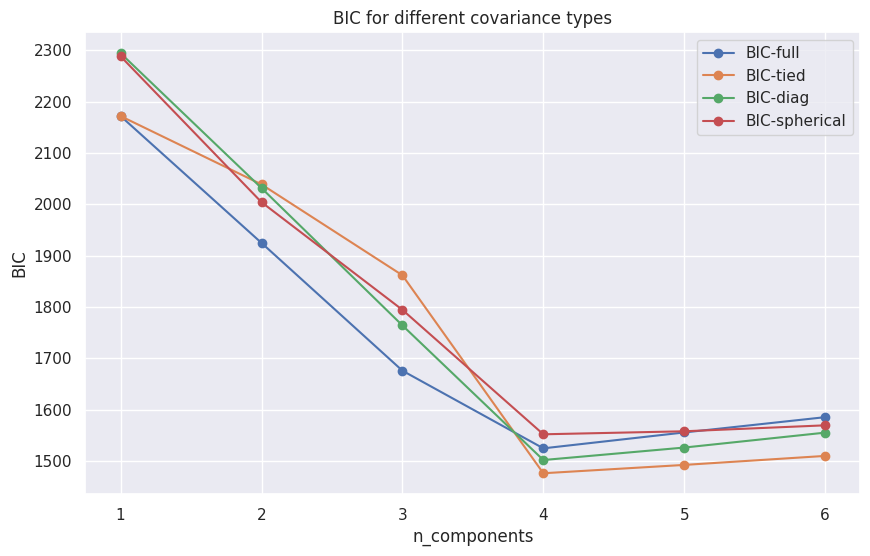

In [3]:
# Fit GMMs for different n_components and covariance types; compute BIC/AIC
n_components = range(1,7)
cov_types = ['full','tied','diag','spherical']
results = []
for cov in cov_types:
    bics = []
    aics = []
    for n in n_components:
        gm = GaussianMixture(n_components=n, covariance_type=cov, random_state=0).fit(X_blob_s)
        bics.append(gm.bic(X_blob_s))
        aics.append(gm.aic(X_blob_s))
    results.append((cov, bics, aics))

plt.figure(figsize=(10,6))
for cov, bics, aics in results:
    plt.plot(n_components, bics, '-o', label=f'BIC-{cov}')
plt.xlabel('n_components')
plt.ylabel('BIC')
plt.legend()
plt.title('BIC for different covariance types')
plt.show()


GMM converged: True
Silhouette: 0.6570501595684539


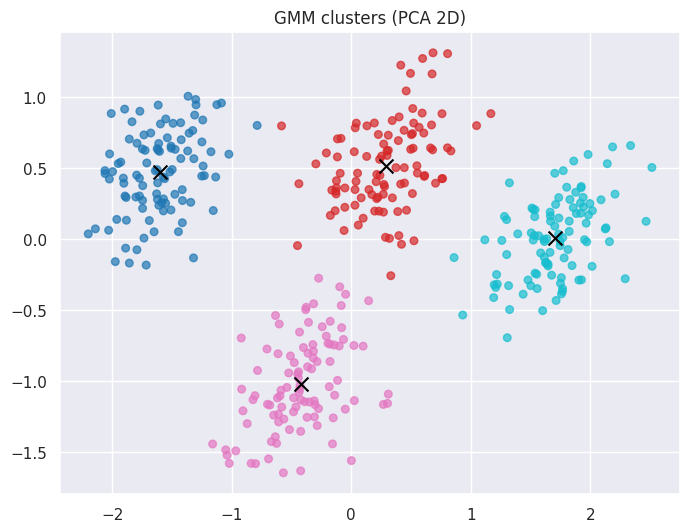

Saved gmm_blob_model.pkl


In [4]:
# Fit final GMM (choose best found e.g., 4 components full covariance)
best_gm = GaussianMixture(n_components=4, covariance_type='full', random_state=0).fit(X_blob_s)
labels_gm = best_gm.predict(X_blob_s)
print('GMM converged:', best_gm.converged_)
print('Silhouette:', silhouette_score(X_blob_s, labels_gm))

# Visualize on 2D PCA with ellipses helper
pca = PCA(n_components=2)
proj = pca.fit_transform(X_blob_s)
means_2d = pca.transform(best_gm.means_)

plt.figure(figsize=(8,6))
plt.scatter(proj[:,0], proj[:,1], c=labels_gm, cmap='tab10', s=30, alpha=0.7)
plt.scatter(means_2d[:,0], means_2d[:,1], c='black', marker='x', s=100)
plt.title('GMM clusters (PCA 2D)')
plt.show()

# Save model
joblib.dump(best_gm, 'gmm_blob_model.pkl')
print('Saved gmm_blob_model.pkl')